# Download File

In [5]:
import requests

url = "https://www.berlin.de/sen/uvk/_assets/verkehr/verkehrsplanung/radverkehr/weitere-radinfrastruktur/zaehlstellen-und-fahrradbarometer/gesamtdatei-stundenwerte.xlsx"
response = requests.get(url)

with open("cycling_berlin_data.xlsx", "wb") as file:
    file.write(response.content)

In [12]:
import pandas as pd
from geopy.distance import geodesic

xlsx = pd.ExcelFile("cycling_berlin_data.xlsx")
df_locations = xlsx.parse("Standortdaten")

columns = {
    'Zählstelle':'id',
    'Beschreibung - Fahrtrichtung': 'name',
    'Breitengrad': 'latitude',
    'Längengrad': 'longitude',
    'Installationsdatum': 'installation_date_str'
}
df_locations = df_locations.rename(columns=columns)

df_locations['installation_date_dt'] = pd.to_datetime(df_locations['installation_date_str'], errors='coerce')

geographical_centrum = {
    "id": "Z-BLN",
    "name": "Gepgraphisches Zentrum",
    "latitude": 52.502778,
    "longitude": 13.404167,
    "installation_date": None
}

def calculate_distance_to_geographical_centrum(row):
    return geodesic((row['latitude'], row['longitude']), 
                    (geographical_centrum['latitude'], geographical_centrum['longitude'])
                    ).meters

df_locations['distance_to_geographical_centrum_in_m'] = df_locations.apply(calculate_distance_to_geographical_centrum, axis=1)

df_locations = df_locations.set_index('id')

df_locations.index

Index(['12-PA-SCH', '02-MI-JAN-N', '02-MI-JAN-S', '13-CW-PRI', '18-TS-YOR-O',
       '18-TS-YOR-W', '19-TS-MON', '27-RE-MAR', '03-MI-SAN-O', '03-MI-SAN-W',
       '05-FK-OBB-O', '05-FK-OBB-W', '26-LI-PUP', '24-MH-ALB', '10-PA-BER-N',
       '10-PA-BER-S', '15-SP-KLO-S', '15-SP-KLO-N', '17-SK-BRE-O',
       '17-SK-BRE-W', '20-TS-MAR-N', '20-TS-MAR-S', '21-NK-MAY', '23-TK-KAI',
       '06-FK-FRA-O', '06-FK-FRA-W', '14-CW-JU-W', '14-CW-JU-O', '01-MI-AL-W',
       '11-PA-SE-N', '04-MI-NO', '03-SP-NO-O', '03-SP-NO-W'],
      dtype='object', name='id')

In [3]:
import folium 
map = folium.Map(location=[52.52437, 13.41053], zoom_start=12)

for index, row in df_locations.iterrows():
    coordinates = [row['latitude'], row['longitude']]
    name = row['name'] + " - " + index
    folium.Marker(location=coordinates, popup='Point', tooltip=name).add_to(map)

geographical_centrum_coordinates =  [geographical_centrum['latitude'], geographical_centrum['longitude']]
folium.Marker(location=geographical_centrum_coordinates, popup='Point', tooltip=geographical_centrum['name']).add_to(map)

map

In [4]:
sheets = [sheet for sheet in xlsx.sheet_names if 'Jahresdatei' in sheet]

df = pd.DataFrame()

for sheet in sheets:
    df_sheet = xlsx.parse(sheet, index_col=0)
    df = pd.concat([df, df_sheet])

In [16]:
pd.set_option('display.max_columns', None)

df.columns = [col.split(' ')[0] for col in df.columns] 
df.columns = [col.split('\n')[0] for col in df.columns]

# Renaming of columns since these difference due to wrong namin
columns = {'17-SZ-BRE-O': '17-SK-BRE-O',
            '17-SZ-BRE-W': '17-SK-BRE-W'}
df = df.rename(columns=columns)
df = df.drop(['02-MI-AL-W', '02-PA-SE-N'], axis=1)
df.head()

,02-MI-JAN-N,02-MI-JAN-S,03-MI-SAN-O,03-MI-SAN-W,05-FK-OBB-O,05-FK-OBB-W,06-FK-FRA-O,06-FK-FRA-W,10-PA-BER-N,10-PA-BER-S,12-PA-SCH,13-CW-PRI,15-SP-KLO-N,15-SP-KLO-S,17-SK-BRE-O,17-SK-BRE-W,18-TS-YOR-O,18-TS-YOR-W,19-TS-MON,20-TS-MAR-N,20-TS-MAR-S,21-NK-MAY,23-TK-KAI,24-MH-ALB,26-LI-PUP,27-RE-MAR,14-CW-JU-O,14-CW-JU-W,01-MI-AL-W,03-SP-NO-O,03-SP-NO-W,04-MI-NO,11-PA-SE-N
Zählstelle Inbetriebnahme,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_all = df.copy()

df_all['sum_count'] = df_all.sum(axis=1)
df_all['recording__stations'] = df_all.notna().apply(lambda row: row.sum(), axis=1)
df_all['avg_count'] = df_all['sum_count'] / df_all['recording__stations']


In [17]:
df_all_avg_year = df.copy().resample('D').sum()
df_all_avg_year = df_all_avg_year.resample('YE').mean()

df_all_avg_year.fillna(0, inplace=True)
for station in df_all_avg_year.columns:
    installation_date = df_locations.loc[station, 'installation_date_dt']

    index_dt = list(df_all_avg_year.index)

    target_index = next(i for i in index_dt if i.year == installation_date.year)

    df_all_avg_year.loc[target_index, station] = 0    

# Remove columns with all zeros
df_all_avg_year = df_all_avg_year.loc[:, (df_all_avg_year!=0).any(axis=0)]


In [13]:
set(df_all_avg_year.columns) - set(df_locations.index)

{'02-MI-AL-W', '02-PA-SE-N'}

In [18]:
df_all_avg_year

,02-MI-JAN-N,02-MI-JAN-S,03-MI-SAN-O,03-MI-SAN-W,05-FK-OBB-O,05-FK-OBB-W,06-FK-FRA-O,06-FK-FRA-W,10-PA-BER-N,10-PA-BER-S,12-PA-SCH,13-CW-PRI,15-SP-KLO-N,15-SP-KLO-S,17-SK-BRE-O,17-SK-BRE-W,18-TS-YOR-O,18-TS-YOR-W,19-TS-MON,20-TS-MAR-N,20-TS-MAR-S,21-NK-MAY,23-TK-KAI,24-MH-ALB,26-LI-PUP,27-RE-MAR,14-CW-JU-O,14-CW-JU-W,01-MI-AL-W,11-PA-SE-N
Zählstelle Inbetriebnahme,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2013-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3519.189041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2014-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2073.534247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2015-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2083.224658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2016-12-31,3770.469945,3894.647541,1613.775956,1849.027322,4722.740437,4480.825137,0.000000,0.000000,0.000000,0.000000,2018.628415,1184.745902,0.000000,0.000000,0.000000,0.000000,2393.653005,2178.049180,3519.418033,0.000000,0.000000,0.000000,0.000000,484.524590,2989.306011,932.016393,0.000000,0.000000,0.00000,0.000000
2017-12-31,3558.663014,3718.657534,1576.243836,1787.857534,4529.397260,4331.071233,1858.545205,1399.120548,3740.643836,2279.279452,1914.591781,1155.271233,649.013699,792.800000,1107.413699,1028.383562,2266.263014,2188.553425,3140.032877,624.706849,393.569863,4410.569863,956.087671,464.646575,2932.832877,980.419178,0.000000,0.000000,0.00000,0.000000
2018-12-31,4061.676712,4208.712329,1461.586301,2073.506849,5179.002740,4971.934247,1318.052055,1711.282192,2974.361644,2509.583562,2009.909589,1363.501370,696.621918,779.386301,1297.668493,1196.331507,2589.183562,2521.810959,3410.131507,633.172603,477.556164,4943.923288,1168.868493,515.906849,3292.306849,1180.720548,0.000000,0.000000,0.00000,0.000000
2019-12-31,4022.035616,4198.454795,302.657534,2255.501370,1874.126027,1678.616438,2125.693151,1780.413699,2916.052055,2485.547945,2012.120548,1213.934247,716.805479,768.306849,1237.627397,932.049315,974.769863,2295.920548,3623.920548,551.268493,470.312329,5030.750685,1224.383562,486.586301,2982.912329,1221.087671,0.000000,0.000000,0.00000,0.000000
2020-12-31,4121.150273,4513.784153,2158.450820,2441.844262,0.000000,0.000000,2593.713115,2260.871585,3374.538251,2952.092896,2505.325137,1610.459016,889.125683,858.994536,1579.486339,1235.827869,2517.172131,3083.898907,4204.991803,625.841530,571.721311,5168.595628,1278.387978,592.898907,3310.704918,1520.795082,0.000000,0.000000,0.00000,0.000000


In [63]:
df_all_avg_year.mean().sort_index()

01-MI-AL-W                                229.791324
02-MI-AL-W                                  4.117123
02-MI-JAN-N                              2770.903283
02-MI-JAN-S                              2863.095335
03-MI-SAN-O                              1205.513190
03-MI-SAN-W                              1530.492495
03-SP-NO-O                                  1.586073
03-SP-NO-W                                  1.486530
04-MI-NO                                   11.144064
05-FK-OBB-O                              2372.392982
05-FK-OBB-W                              2237.869903
06-FK-FRA-O                              1337.792859
06-FK-FRA-W                              1207.868842
10-PA-BER-N                              1994.956556
10-PA-BER-S                              1665.676549
11-PA-SE-N                                302.653881
12-PA-SCH                                2257.438150
13-CW-PRI                                1009.079634
14-CW-JU-O                                268.

In [29]:
# df_mi = df_.resample('ME').sum()
df_all = df_all.resample('ME').sum()

In [22]:
df_al = df_al.loc[(df_al!=0).any(axis=1)]

In [39]:
df_al['Time'] = range(len(df_al))
apply_lr(df_al)

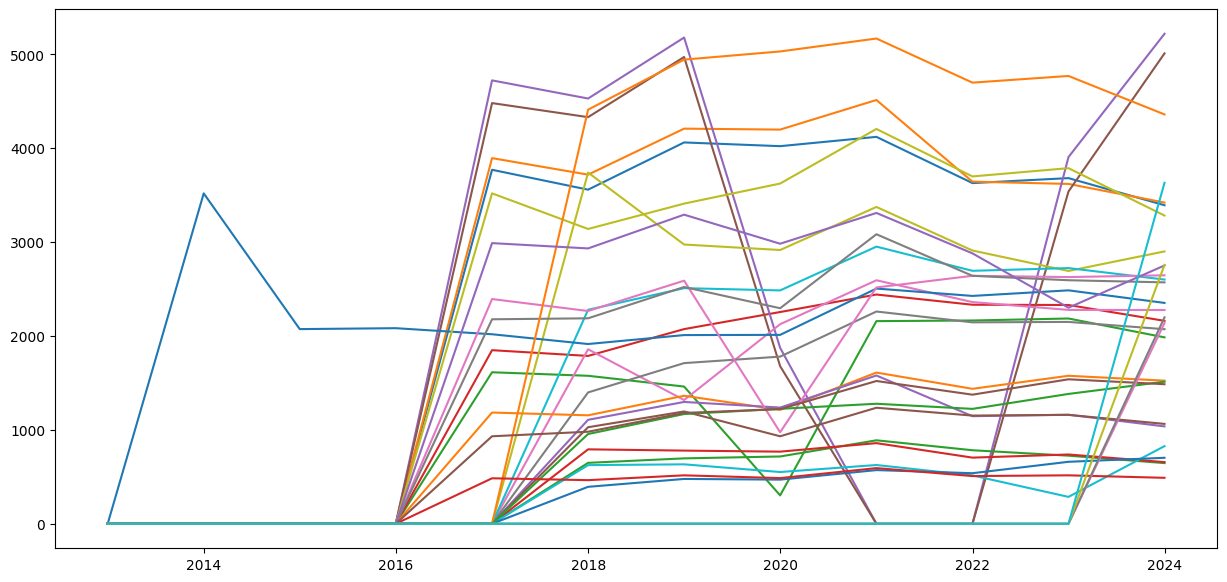

In [21]:
show_all_stations(df_all_avg_year)

In [20]:
import matplotlib.pyplot as plt

def show_all_stations(df):
    fig, ax = plt.subplots(figsize=(15, 7))

    for col in df.columns:
        ax.plot(df.index, df[col], label=col, linestyle='-')
        
    plt.show()

def show_one_station(df, col):
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.plot(df.index, df[col], label=col, linestyle='-')
    plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

def apply_lr(df):
    X = df.loc[:, ['Time']]
    y = df.loc[:, '06-FK-FRA-W 01.06.2016']

    model = LinearRegression()
    model.fit(X, y)

    